In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori

In [31]:
df = pd.read_csv('Market_Basket.csv',header = None)

In [32]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Data Cleaning
df.replace(np.nan,0,inplace = True)

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df.shape

(7501, 20)

In [43]:
#data preprocessing
#for apriori convert into list format
transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i,j]) for j in range(df.shape[1]) if str(df.values[i,j]) != '0'])

In [44]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [49]:
itemset,rules = apriori(transactions,min_support = 0.02 ,min_confidence = 0.2)

In [50]:
itemset

{1: {('shrimp',): 536,
  ('almonds',): 153,
  ('avocado',): 250,
  ('vegetables mix',): 193,
  ('cottage cheese',): 239,
  ('energy drink',): 200,
  ('tomato juice',): 228,
  ('low fat yogurt',): 574,
  ('green tea',): 991,
  ('honey',): 356,
  ('mineral water',): 1788,
  ('salmon',): 319,
  ('frozen smoothie',): 475,
  ('olive oil',): 494,
  ('burgers',): 654,
  ('meatballs',): 157,
  ('eggs',): 1348,
  ('turkey',): 469,
  ('milk',): 972,
  ('energy bar',): 203,
  ('whole wheat rice',): 439,
  ('whole wheat pasta',): 221,
  ('french fries',): 1282,
  ('soup',): 379,
  ('frozen vegetables',): 715,
  ('spaghetti',): 1306,
  ('cookies',): 603,
  ('cooking oil',): 383,
  ('champagne',): 351,
  ('chocolate',): 1229,
  ('chicken',): 450,
  ('oil',): 173,
  ('fresh tuna',): 167,
  ('tomatoes',): 513,
  ('red wine',): 211,
  ('pepper',): 199,
  ('ham',): 199,
  ('pancakes',): 713,
  ('grated cheese',): 393,
  ('fresh bread',): 323,
  ('ground beef',): 737,
  ('escalope',): 595,
  ('herb & pep

In [51]:
rules

[{burgers} -> {eggs},
 {burgers} -> {french fries},
 {burgers} -> {mineral water},
 {burgers} -> {spaghetti},
 {cake} -> {mineral water},
 {chicken} -> {mineral water},
 {chocolate} -> {eggs},
 {french fries} -> {chocolate},
 {chocolate} -> {french fries},
 {frozen vegetables} -> {chocolate},
 {ground beef} -> {chocolate},
 {milk} -> {chocolate},
 {mineral water} -> {chocolate},
 {chocolate} -> {mineral water},
 {spaghetti} -> {chocolate},
 {chocolate} -> {spaghetti},
 {cooking oil} -> {mineral water},
 {french fries} -> {eggs},
 {eggs} -> {french fries},
 {frozen vegetables} -> {eggs},
 {milk} -> {eggs},
 {mineral water} -> {eggs},
 {eggs} -> {mineral water},
 {pancakes} -> {eggs},
 {spaghetti} -> {eggs},
 {eggs} -> {spaghetti},
 {green tea} -> {french fries},
 {pancakes} -> {french fries},
 {frozen smoothie} -> {mineral water},
 {frozen vegetables} -> {milk},
 {frozen vegetables} -> {mineral water},
 {frozen vegetables} -> {spaghetti},
 {green tea} -> {mineral water},
 {green tea} ->

In [52]:
itemset.keys()

dict_keys([1, 2])

In [53]:
x = []
for i in list(itemset.keys()):
    x.append(pd.Series(itemset[i]))

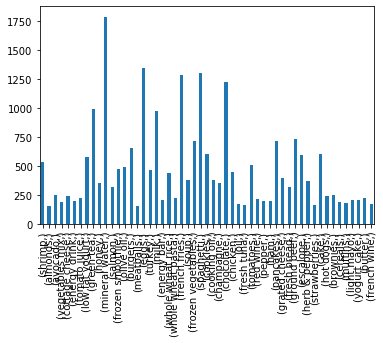

In [55]:
x[0].plot.bar()

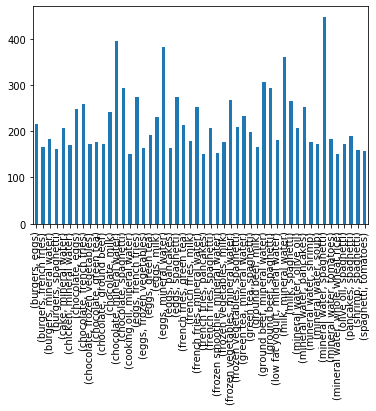

In [56]:
x[1].plot.bar()

In [82]:
df2 = pd.read_csv('groceriesDataset.csv')

In [83]:
df2

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
(df2.isnull() | df2.empty | df2.isna()).sum()

Item(s)       0
Item 1        0
Item 2     2159
Item 3     3802
Item 4     5101
Item 5     6106
Item 6     6961
Item 7     7606
Item 8     8151
Item 9     8589
Item 10    8939
Item 11    9185
Item 12    9367
Item 13    9484
Item 14    9562
Item 15    9639
Item 16    9694
Item 17    9740
Item 18    9769
Item 19    9783
Item 20    9797
Item 21    9806
Item 22    9817
Item 23    9821
Item 24    9827
Item 25    9828
Item 26    9828
Item 27    9829
Item 28    9830
Item 29    9831
Item 30    9834
Item 31    9834
Item 32    9834
dtype: int64

In [85]:
df2.replace(np.nan,0,inplace = True)

In [86]:
df2

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,tropical fruit,yogurt,coffee,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,0,0,0,0,0,0,0,0,0,0
9831,1,cooking chocolate,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,0,0,0,0,0,0,0,0,0,0
9833,4,semi-finished bread,bottled water,soda,bottled beer,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
(df2.isnull() | df2.empty | df2.isna()).sum()

Item(s)    0
Item 1     0
Item 2     0
Item 3     0
Item 4     0
Item 5     0
Item 6     0
Item 7     0
Item 8     0
Item 9     0
Item 10    0
Item 11    0
Item 12    0
Item 13    0
Item 14    0
Item 15    0
Item 16    0
Item 17    0
Item 18    0
Item 19    0
Item 20    0
Item 21    0
Item 22    0
Item 23    0
Item 24    0
Item 25    0
Item 26    0
Item 27    0
Item 28    0
Item 29    0
Item 30    0
Item 31    0
Item 32    0
dtype: int64

In [88]:
#data pre processing
df2.drop('Item(s)',axis = 1,inplace = True)

In [89]:
df2

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,whole milk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,0,0,0,0,0,0,0,0,0,0
9831,cooking chocolate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,0,0,0,0,0,0,0,0,0,0
9833,semi-finished bread,bottled water,soda,bottled beer,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
transactions = []
for i in range(len(df2)):
    transactions.append([str(df2.values[i,j]) for j in range(0,32) if str(df2.values[i,j]) != '0'])

In [91]:
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [104]:
itemsets,rules = apriori(transactions,min_support = 0.05,min_confidence = 0.08)

In [105]:
itemsets

{1: {('citrus fruit',): 814,
  ('margarine',): 576,
  ('tropical fruit',): 1032,
  ('yogurt',): 1372,
  ('coffee',): 571,
  ('whole milk',): 2513,
  ('pip fruit',): 744,
  ('other vegetables',): 1903,
  ('butter',): 545,
  ('rolls/buns',): 1809,
  ('bottled beer',): 792,
  ('bottled water',): 1087,
  ('curd',): 524,
  ('beef',): 516,
  ('frankfurter',): 580,
  ('soda',): 1715,
  ('fruit/vegetable juice',): 711,
  ('newspapers',): 785,
  ('pastry',): 875,
  ('root vegetables',): 1072,
  ('canned beer',): 764,
  ('sausage',): 924,
  ('brown bread',): 638,
  ('shopping bags',): 969,
  ('napkins',): 515,
  ('pork',): 567,
  ('whipped/sour cream',): 705,
  ('domestic eggs',): 624},
 2: {('other vegetables', 'whole milk'): 736,
  ('rolls/buns', 'whole milk'): 557,
  ('whole milk', 'yogurt'): 551}}

In [106]:
rules

[{whole milk} -> {other vegetables},
 {other vegetables} -> {whole milk},
 {whole milk} -> {rolls/buns},
 {rolls/buns} -> {whole milk},
 {yogurt} -> {whole milk},
 {whole milk} -> {yogurt}]